## Kernels Project
(Unsupervised Learning - K-Means Clustering)

### 01. Data science project implementation

A group has obtained a sample of 210 mixed kernels of three different wheat varieties, Kama, Rosa and Canadense, with 70 elements each, and they have knowledge of various parameters such as area, perimeter, length, etc.

The goal of this project is to use the dataset and create an ML model capable of separating the varieties of kernels for further studies.

To create this model and complete this task, a k-means clustering model was used using pyspark with Spark's MLlib.
The data used is in the file "seeds_dataset.csv" in csv format and, after being received, was processed for later use by ML.
The data used is not artificial data, but real data on real ships obtained from the UCI Machine Learning Repository, which is University of California Irvine's online machine learning repository. 


In [ ]:
# Import related packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()

# Build the model
from pyspark.ml.clustering import KMeans

# Feature Selection
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

### 02. Sourcing Data

In [ ]:
dataset = spark.read.csv('/FileStore/tables/seeds_dataset.csv', header=True, inferSchema=True)
dataset.show(5)
dataset.printSchema()

+-----+---------+-----------+------------------+------------------+---------------------+----------------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|            5.22|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|           4.956|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|           4.825|
|13.84|    13.94|     0.8955|             5.324|3.3789999999999996|                2.259|           4.805|
|16.14|    14.99|     0.9034|5.6579999999999995|             3.562|                1.355|           5.175|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+
only showing top 5 rows

root
 |-- ar

### 03. Exploratory Data Analysis and Data Cleaning

In [ ]:
dataset.describe().show()

+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|summary|              area|         perimeter|         compactness|   length_of_kernel|   width_of_kernel|asymmetry_coefficient|   length_of_groove|
+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|  count|               210|               210|                 210|                210|               210|                  210|                210|
|   mean|14.847523809523816|14.559285714285718|  0.8709985714285714|  5.628533333333335| 3.258604761904762|   3.7001999999999997|  5.408071428571429|
| stddev|2.9096994306873647|1.3059587265640225|0.023629416583846364|0.44306347772644983|0.3777144449065867|   1.5035589702547392|0.49148049910240543|
|    min|             10.59|             12.41|              0.8081|              4.899|            

In [ ]:
df = dataset.toPandas()

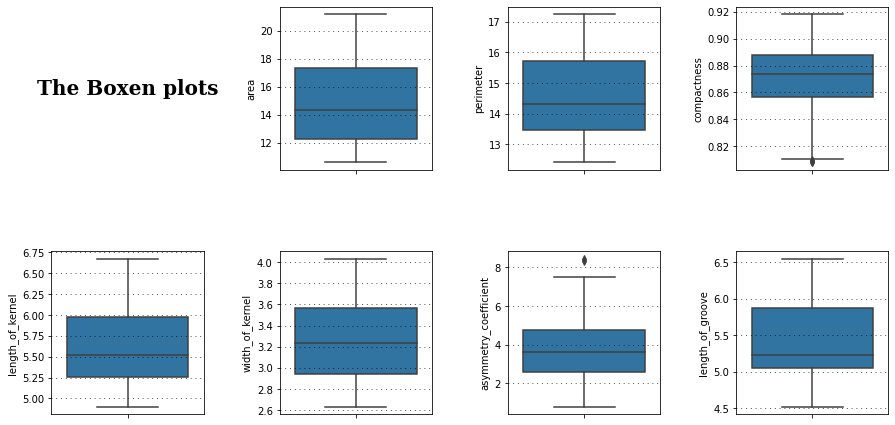

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1]) # area
ax2 = fig.add_subplot(gs[0,2]) # perimeter
ax3 = fig.add_subplot(gs[0,3]) # compactness
ax4 = fig.add_subplot(gs[1,0]) # length_of_kernel
ax5 = fig.add_subplot(gs[1,1]) # width_of_kernel
ax6 = fig.add_subplot(gs[1,2]) # asymmetry_coefficient
ax7 = fig.add_subplot(gs[1,3]) # length_of_groove

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False) 
ax0.text(0.5,0.5,
         'The Boxen plots',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1, data=df, y='area')

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2, data=df, y='perimeter')

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3, data=df, y='compactness')

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4, data=df, y='length_of_kernel')

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5, data=df, y='width_of_kernel')

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax6, data=df, y='asymmetry_coefficient')

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax7, data=df, y='length_of_groove')

plt.show()

The analysis of the boxen plot is not conclusive and needs further study, but it does show that characteristics such as lengh_of_kernel and length_of_groove are positive symmetric which can be explained if there are different groups.

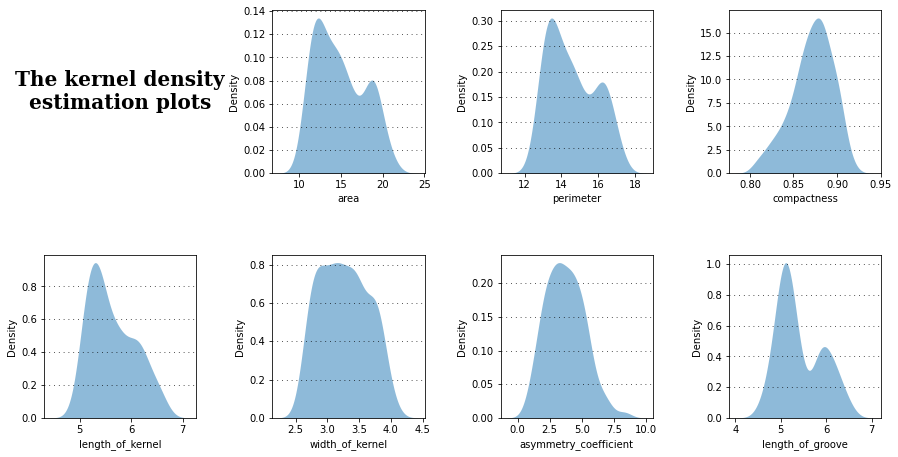

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1]) # area
ax2 = fig.add_subplot(gs[0,2]) # perimeter
ax3 = fig.add_subplot(gs[0,3]) # compactness
ax4 = fig.add_subplot(gs[1,0]) # length_of_kernel
ax5 = fig.add_subplot(gs[1,1]) # width_of_kernel
ax6 = fig.add_subplot(gs[1,2]) # asymmetry_coefficient
ax7 = fig.add_subplot(gs[1,3]) # length_of_groove

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False) 
ax0.text(0.5,0.5,
         'The kernel density\nestimation plots',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='area', fill=True,  alpha=.5, linewidth=0)

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df, x='perimeter', fill=True,  alpha=.5, linewidth=0)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='compactness', fill=True,  alpha=.5, linewidth=0)

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax4, data=df, x='length_of_kernel', fill=True, alpha=.5, linewidth=0)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='width_of_kernel', fill=True, alpha=.5, linewidth=0)

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax6, data=df, x='asymmetry_coefficient', fill=True,  alpha=.5, linewidth=0)

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='length_of_groove', fill=True,  alpha=.5, linewidth=0)

plt.show()

Analysis of the kernel density estimation plots reveals the distribution of the data between the different categories.
- The distributions of compactness, width_of_kernel and asymmetry_coefficient follow a normal distribution pattern. 
- The area, perimeter, length_of_kernel and length_of_groove follow a bimodal distribution which indicates different groups of kernels in the same data.

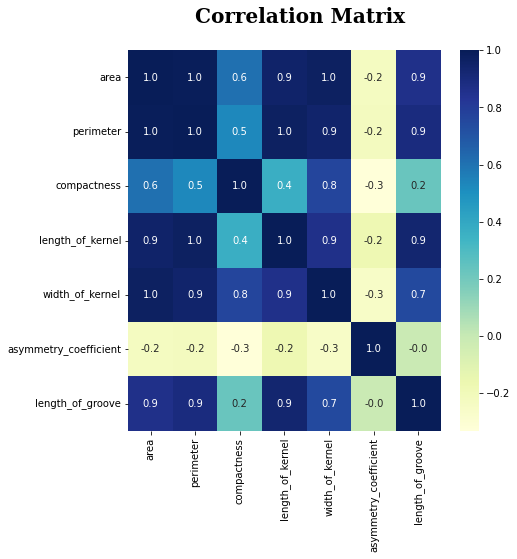

In [ ]:
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])
ax0.text(1.5,-0.5,"Correlation Matrix",fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")

sns.heatmap(df.corr(),fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

The asymmetry coefficient has the weakest correlation between the elements, showing that this can interfere negatively with the model.<br />
Compactness has different correlations between the other features, showing strong results with width_of_kernel and weak ones with lenght_of_groove, but in the end it can still be used.<br />
The other elements show strong or very strong correlations that can be very good for the model

### 04. Modeling and Evaluation

In [ ]:
print(dataset.columns)
correlated_columns = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'length_of_groove']

['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_groove']


In [ ]:
# 4.1 VectorAssembler
assembler = VectorAssembler(inputCols=correlated_columns, outputCol='features')
final_data = assembler.transform(dataset)
final_data.show(5)
final_data.printSchema()

+-----+---------+-----------+------------------+------------------+---------------------+----------------+--------------------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|            features|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+--------------------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|            5.22|[15.26,14.84,0.87...|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|           4.956|[14.88,14.57,0.88...|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|           4.825|[14.29,14.09,0.90...|
|13.84|    13.94|     0.8955|             5.324|3.3789999999999996|                2.259|           4.805|[13.84,13.94,0.89...|
|16.14|    14.99|     0.9034|5.6579999999999995|             3.562|                1.355|           5.17

In [ ]:
# 4.2. StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(final_data)
final_data = scaler_model.transform(final_data)
final_data.show(5)

+-----+---------+-----------+------------------+------------------+---------------------+----------------+--------------------+--------------------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|            features|      scaledFeatures|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+--------------------+--------------------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|            5.22|[15.26,14.84,0.87...|[5.24452795332028...|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|           4.956|[14.88,14.57,0.88...|[5.11393027165175...|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|           4.825|[14.29,14.09,0.90...|[4.91116018695588...|
|13.84|    13.94|     0.8955|             5.324|3.3789999999999996|                2.259|           4.805|

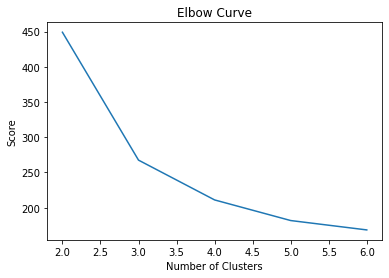

In [ ]:
# 4.3. Modeling
# Calculate cost and plot
df = final_data
feature_selected = 'scaledFeatures'

cost = np.zeros(7)
value_range = range(2,7)

for k in value_range:
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol(feature_selected)
    model = kmeans.fit(df)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
df_cost.insert(0, 'cluster', value_range)

plt.plot(df_cost.cluster, df_cost.cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.<br/>
In this project, we already know that we have 3 different kernels, so we'll use k=3

In [ ]:
model = KMeans(featuresCol='scaledFeatures', k=3).fit(final_data)
wcss = model.summary.trainingCost # training cost = sum of squared distances to the nearest centroid for all points in the training dataset
wcss # R : 267.48

Out[81]: 267.47732222659977

In [ ]:
centers = model.clusterCenters()
centers # k = 3

Out[52]: [array([ 4.98278994, 11.00139547, 37.31683332, 12.46295815,  8.65872714,
        10.49500868]),
 array([ 6.39590332, 12.44428206, 37.43638768, 13.98342943,  9.82120071,
        12.32328904]),
 array([ 4.05073749, 10.12305017, 35.83934686, 11.79495614,  7.50120713,
        10.3493134 ])]

In [ ]:
results = model.transform(final_data)
results.show(3)
results.groupBy('prediction').count().show()

+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+--------------------+----------+
| area|perimeter|compactness| length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|            features|      scaledFeatures|prediction|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+--------------------+----------+
|15.26|    14.84|      0.871|            5.763|             3.312|                2.221|            5.22|[15.26,14.84,0.87...|[5.24452795332028...|         0|
|14.88|    14.57|     0.8811|5.553999999999999|             3.333|                1.018|           4.956|[14.88,14.57,0.88...|[5.11393027165175...|         0|
|14.29|    14.09|      0.905|            5.291|3.3369999999999997|                2.699|           4.825|[14.29,14.09,0.90...|[4.91116018695588...|         0|
+-----+---------+-----------+-----------------

### 05. Discussion and Conclusion

The dataset worked on has no classified elements that could be used to train any algorithm, and the use of the unsupervised k-means ML model was the best option.<br />
It was possible to identify correlated properties of each kernel and use the ML model to separate the groups efficiently.